# Introduction à l'opimisation différentiable : méthodes de descente de gradients

Le but du TP est d'illustrer les performances d'un certain nombre de méthodes classiques pour l'optimisation sans contrainte, dans le cas de problèmes quadratiques et non-linéaires. 

In [1]:
#
# Chargement des librairies
#
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la
from scipy import linalg as sla
import math
import functools as ft

 ## Définition des problèmes d'optimisation

Les problèmes étudiés seront les suivants :
 
   $(\mathcal{P}_1)\quad \min_{x \in \mathbb{R}^n} f(x)=x^TAx+b^Tx$, avec $A$ symétrique définie positive;
   
   $(\mathcal{P}_2)\quad \min_{x \in \mathbb{R}^2} f(x)=100(x_2-x_1^2)^2+(1-x_1)^2$, avec f la fonction de Rosenbrock.
  
La minimisation de fonctionnelles quadratiques (problème $(\mathcal{P}_1)$) constitue la base sur lequel s'appuie un certain nombre de méthodes d'optimisation. Le problème $(\mathcal{P}_2)$ permet d'illustrer les difficultés qui surgissent quand on cherche à minimsier une fonction non-linéaire non-quadratique.

## I - Minimisation d'une fonction quadratique

In [2]:
## Problèmes quadratiques
def build_problem(n,condA):
    # Construction d'une matrice symétrique définie positive
    # et d'un vecteur de même dimension
    # n : entier, dimension de la matrice
    # condA : entier, conditionnement de la matrice 10^condA
    # Sortie : matrice A, vecteur b
    
    A = np.zeros([n,n])
    Q,R=sla.qr(np.random.rand(n,n))
    D=np.diag((10*np.ones([n]))**np.linspace(-condA,0,num=n))
    A=np.matmul(np.matmul(np.transpose(Q),D),Q)    
    
    b=np.random.randn(n,1)
    
    return A,b

# Paramètres du problème
condA=3
n=100
A,b=build_problem(n,condA)


**Question**: Implanter les fonctions f, gradient de f et Hessienne de f associée au problème $(\mathcal{P}_1)$

In [3]:
def fquad(x,A,b):
    # Fonction quadratique : f(x)=0.5*x'*A*x+b'*x
    # A : matrice symétrique de taille n
    # b,x : vecteurs de taille n
    
    #TO DO
    
    return f

def gquad(x,A,b):
    # Gradient de la fonction fquad
    # A : matrice symétrique de taille n
    # b,x : vecteurs de taille n
    
    #TO DO
    
    return g
    
def hquad(x,A,b):
    # Gradient de la fonction fquad
    # A : matrice symétrique de taille n
    # b,x : vecteurs de taille n
    
    return H

 ### I-1 Application de la méthode de la plus grande pente ("steepest descent").
 
 **Question**: Implanter la méthode de la "steepest descent" pour la minimisation d'une fonction quadratique. Vous pourrez anticiper l'utilisation de méthode de descente de gradient pour le cas de fonctions non-quadratiques (different choix de pas).

In [10]:
# TO DO
# Au choix : une fonction "steepest descente" ou des fonctions descentes et "pas optimal".
# En sortie, la fonction devra renvoyer : 
#       x : vecteur contenant l'itéré optimisé.
#       flag : un entier indiquant la raison d'arrêt de l'algorithme : 1 - convergence, 
#              2 - stagnation de la suite des itérés, 3 - nombre d'itérations maximum atteint.
#       nbiter : nombre d'itérations réalisées.
#       iterf : tableau contenant les valeurs de f au cours de la minimisation.

**Question**: Résoudre le problème d'optimisation $(\mathcal{P}_1)$. Evaluez la sensibilité des résultats aux paramètres d'entrée de l'algorithme ($x_0$, tolérances, nombre d'itérations maximum,..).

In [4]:
#Définition des paramètres de la méthode : x0, tolérances, nombre d'itérations,etc ..
# TO DO

# Résolution du problème d'optimisation
# TO DO

# Affichages 
#  x est le vecteur obtenu en sortie de minimisation.
#  flag est l'entier indiquant la condition d'arrêt activée. 
#  fopt est la valeur optimale théorique.
#  iterf est le tableau contenant les valeurs de f au cours de la minimisation.

tmp=sla.solve(A,-b)
fopt=0.5*np.dot(np.transpose(b),tmp)
print("Valeur optimale théorique de f:",fopt)
print("Valeur à l'optinum numérique:", fquad(x,A,b))
print("Condition d'arrêt:", flag)
if flag > 1:
    print("Norme du gradient initial:",la.norm(gquad(x0,A,b)))
    print("Norme du gradient:",la.norm(gquad(x,A,b)))

plt.plot(iterf[:,0,0])
plt.ylabel('f')
plt.xlabel('Itérations')
plt.show()

Valeur optimale théorique de f: [[-6749.32202287]]


NameError: name 'x' is not defined

**Question**: Illuster l'impact du conditionnement de $A$ sur les performances de l'algorithme. Vous afficherez l'évolution du nombre d'itérations en focntion du conitionnement de $A$. 

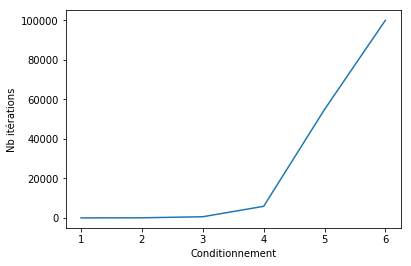

In [8]:
#Intitialisation du problème
x0=np.random.randn(n,1)
param=[10**(-6),10**(-12),100000]
iterC=np.array([])
condAmax=6

# Boucle sur le nombre de conditionnement
for condA in range(condAmax):
    # TO DO
    # Génération et résolution du problème d'optimisation
    
    # Sauvegarde du nombre d'itérations
    iterC=np.concatenate((iterC,np.array([nbiter])))

# Affichage
xx=np.log10((10*np.ones([condAmax]))**np.linspace(1,condAmax,num=condAmax))
plt.plot(xx,iterC)
plt.ylabel('Nb itérations')
plt.xlabel('Conditionnement')
plt.show()

 ### I-2 Application de la méthode de Newton.
 
 **Question**: Implanter la méthode de Newton pour la minimisation d'une fonction quadratique. Vous utiliserez la méthode du gradient conjugué, déjà implantée, pour résoudre le système linéaire associé. 

In [9]:
def CG(x0,A,b,tol,itermax):
    #Gradient conjugé
    
    x=x0
    niter=0
    r=b-np.dot(A,x)
    d=r
    nb=la.norm(b)
    delta_new=np.dot(np.transpose(r),r)
    iterf=np.array([math.sqrt(delta_new)])
    convergence=0
    
    while convergence ==0:
        niter=niter+1
       
        #pas optimal
        q=np.dot(A,d)
        den=np.dot(np.transpose(d),q)
        alpha=delta_new/den
        
        #mise à jour
        x=x+alpha*d
        r=r-alpha*q
    
        delta_old=delta_new
        delta_new=np.dot(np.transpose(r),r)
       
        #nouvelle direction
        beta=delta_new/delta_old
        d=r+beta*d
        
        #Test d'arrêt
        if math.sqrt(delta_new) <= tol*(nb+10**(-14)):
            convergence=1
        elif niter == itermax:
            convergence=2
        
        iterf=np.concatenate((iterf,np.array([math.sqrt(delta_new)])))
        
    #fin boucle
    return x,iterf,niter,convergence    

In [9]:
# TO DO
# Fonction rélisant la minimisation par méthode de Newton 
# En sortie, la fonction devra renvoyer : 
#       x : vecteur contenant l'itéré optimisé.
#       flag : un entier indiquant la raison d'arrêt de l'algorithme : 1 - convergence, 
#              2 - stagnation de la suite des itérés, 3 - nombre d'itérations maximum atteint.
#       nbiter : nombre d'itérations réalisées.
#       iterf : tableau contenant les valeurs de f au cours de la minimisation.
#       iterCG : le nombre total d'itérations réalisées lors de sdifférents appels du gradient
#                conjugué.


**Question**: Appliquer la méthode de Newton au problème $(\mathcal{P}_1)$. Vous afficherez le nombre d'itérations de la méthode de Newton.

Valeur optimale théorique de f: [[-67078.77195198]]
Valeur à l'optinum numérique: [[-67078.77195198]]
Condition d'arrêt: 1


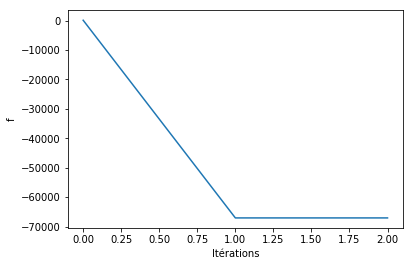

In [11]:
# Nouvelle définition des paramètres du problème
condA=3
n=1000
A,b=build_problem(n,condA)

#Définition des paramètres de la méthode : x0, tolérances, nombre d'itérations,etc ..
# TO DO

# Résolution du problème d'optimisation
# TO DO

# Affichages 
#  x est le vecteur obtenu en sortie de minimisation.
#  flag est l'entier indiquant la condition d'arrêt activée. 
#  fopt est la valeur optimale théorique.
#  iterf est le tableau contenant les valeurs de f au cours de la minimisation.

tmp=sla.solve(A,-b)
fopt=0.5*np.dot(np.transpose(b),tmp)
print("Valeur optimale théorique de f:",fopt)
print("Valeur à l'optinum numérique:", fquad(x,A,b))
print("Condition d'arrêt:", flag)
if flag > 1:
    print("Norme du gradient initial:",la.norm(gquad(x,A,b)))
    print("Norme du gradient:",la.norm(gquad(x,A,b)))

plt.plot(iterf[:,0,0])
plt.ylabel('f')
plt.xlabel('Itérations')
plt.show()

**Question**: Illustrer l'impact du conditionnement de $A$ sur les performances de l'algorithme. Vous afficherez le nombre d'itérations de la méthode de Newton et le nombre d'itérations du gradient conjugué.

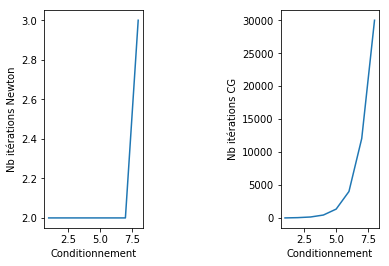

In [12]:
#Intitialisation du problème
x0=np.random.randn(n,1)
param=[10**(-6),10**(-12),100000]
iterC=np.array([])
iterTCG=np.array([])
condAmax=8

# Boucle sur le nombre de conditionnement
for condA in range(condAmax):
    # TO DO
    # Génération et résolution du problème d'optimisationA,b0=build_problem(n,condA)
    
    # Sauvegarde du nombre d'itérations de la méthdode de Newton et du gradient conjugué
    iterC=np.concatenate((iterC,np.array([nbiter])))
    iterTCG=np.concatenate((iterTCG,np.array([iterCG])))

    
# Affichage
xx=np.log10((10*np.ones([condAmax]))**np.linspace(1,condAmax,num=condAmax))

plt.subplot(131)
plt.plot(xx,iterC)
plt.ylabel('Nb itérations Newton')
plt.xlabel('Conditionnement')

plt.subplot(133)
plt.plot(xx,iterTCG)
plt.ylabel('Nb itérations CG')
plt.xlabel('Conditionnement')

plt.show()

## II - Minimisation d'une fonction non-linéaire

In [11]:
## Problèmes non-linéaires : fonction de Rosenbrock
def f2(x):
    # fonction de Rosenbrock de R^2 dans R
    # x vecteur de taille 2
    f=100*(x[1]-x[0]**2)**2+(1-x[0])**2
    return f

def g2(x):
    # gradient de la fonction de Rosenbrock
    # x vecteur de taille 2
    g=np.zeros([2,1])
    g[0]=-400.0*x[0]*(x[1]-x[0]**2)-2*(1-x[0])
    g[1]=200.0*(x[1]-x[0]**2)
    return g

def h2(x):
    # Hessienne de la fonction de Rosenbrock
    # x vecteur de taille 2
    H=np.zeros([2,2])
    H[0,0]=1200*x[0]**2+2-400*x[1]
    H[0,1]=-400*x[0]
    H[1,0]=H[0,1]
    H[1,1]=200.
    return H

**Question**: Implanter les stratégies de pas constant et de backtracking.  Implanter la méthode de descente de gradient avec choix de pas (vous pouvez utiliser l'algorithme  de descente de gradient développé pour la steepest descent).

In [14]:
# TO DO

**Question**: Appliquer la méthode de descente avec les différentes stratégies de pas au problème $(\mathcal{P}_2)$.

Valeur optimale théorique de f: 0
Valeur à l'optinum numérique: [8.95815345e-09]
Condition d'arrêt: 1


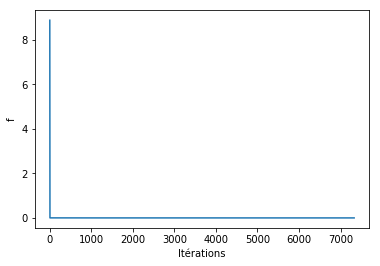

In [16]:
# Paramètres du problème
n=2
# Minimum global
xopt=np.ones([n,1])
# Point de départ
sigma_b=0.1
x0=xopt+sigma_b*np.random.randn(n,1)

#Définition des paramètres de la méthode : tolérances, nombre d'itérations,etc ..
# TO DO

# Résolution du problème d'optimisation
# TO DO

# Affichage
#  x est le vecteur obtenu en sortie de minimisation.
#  flag est l'entier indiquant la condition d'arrêt activée. 
#  iterf est le tableau contenant les valeurs de f au cours de la minimisation.

print("Valeur optimale théorique de f:",f2(xopt))
print("Valeur à l'optinum numérique:", f2(x))
print("Condition d'arrêt:", flag)
if flag > 1:
    print("Norme du gradient initial:",la.norm(g2(x0)))
    print("Norme du gradient:",la.norm(g2(x)))

    
plt.plot(iterf[:,0])
plt.ylabel('f')
plt.xlabel('Itérations')
plt.show()

**Question**: Modifier le code l'algorithme Newton pour inclure la recherche de pas. 

In [17]:
# TO DO
# Fonction rélisant la minimisation par méthode de Newton avec stratégies de pas
# En sortie, la fonction devra renvoyer : 
#       x : vecteur contenant l'itéré optimisé.
#       flag : un entier indiquant la raison d'arrêt de l'algorithme : 1 - convergence, 
#              2 - stagnation de la suite des itérés, 3 - nombre d'itérations maximum atteint.
#       nbiter : nombre d'itérations réalisées.
#       iterf : tableau contenant les valeurs de f au cours de la minimisation.
#       iterCG : le nombre total d'itérations réalisées lors de sdifférents appels du gradient
#                conjugué.


**Question**: Evaluer les performances de cette approche pour les différentes stratégies de pas.

Valeur optimale théorique de f: 0
Valeur à l'optinum numérique: [8.63803584e-08]
Condition d'arrêt: 1


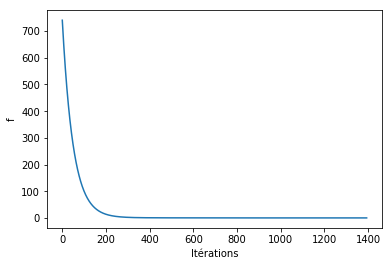

In [19]:
# Paramètres du problème
n=2
# Minimum global
xopt=np.ones([n,1])
# Point de départ
sigma_b=1
x0=xopt+sigma_b*np.random.randn(n,1)

#Définition des paramètres de la méthode : tolérances, nombre d'itérations,etc ..
# TO DO

# Résolution du problème d'optimisation
# TO DO

# Affichage
#  x est le vecteur obtenu en sortie de minimisation.
#  flag est l'entier indiquant la condition d'arrêt activée. 
#  iterf est le tableau contenant les valeurs de f au cours de la minimisation.


print("Valeur optimale théorique de f:",f2(xopt))
print("Valeur à l'optinum numérique:", f2(x))
print("Condition d'arrêt:", flag)
if flag > 1:
    print("Norme du gradient initial:",la.norm(g2(x0)))
    print("Norme du gradient:",la.norm(g2(x)))

    
plt.plot(iterf[:,0])
plt.ylabel('f')
plt.xlabel('Itérations')
plt.show()